# LeafScans WorkBook 2:
In this notebook:  
* Create train-test code loop for lin regression and then apply to other ML in future
* Input: targets - Leaf nutrient or leaf Gas exchange parameter, features - ndvi calculated from hyperspectral scan
* Output: R2 scores from external group in 5-fold CV where groups are informed by Genotype data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
df_nutes = pd.read_csv(r'../Data/NuteScansAll_merged.csv')
df_gasex = pd.read_csv(r'../Data/GasExScansAll_Merged.csv')
# Calculate NDVI 
df_nutes['ndvi'] = (df_nutes['800'] - df_nutes['651'])/(df_nutes['800'] + df_nutes['651'])
df_nutes_R2 = df_nutes[df_nutes['DevStage'] == 'R2'].reset_index()

In [3]:
# Wavelengths list usefule for graphing and looping
wavelengths = df_gasex.columns[20:355].astype(str)

In [4]:
print(df_gasex.columns[3:8])
targets = list(df_gasex.columns[3:8])

Index(['E', 'A', 'Ci', 'gsw', 'WUE'], dtype='object')


In [5]:
# Cooks D
# Running Cooks D to search for outliers, nothing jumps out
import statsmodels.api as sm

In [6]:
y = df_gasex['A']
x = df_gasex['ndvi']
reg = sm.OLS(y, x).fit()
influence = reg.get_influence()
cooks = influence.cooks_distance
df_cooks = pd.DataFrame({'ndvi': df_gasex['ndvi'], 'cook_d': cooks[0]})

<Axes: xlabel='ndvi', ylabel='cook_d'>

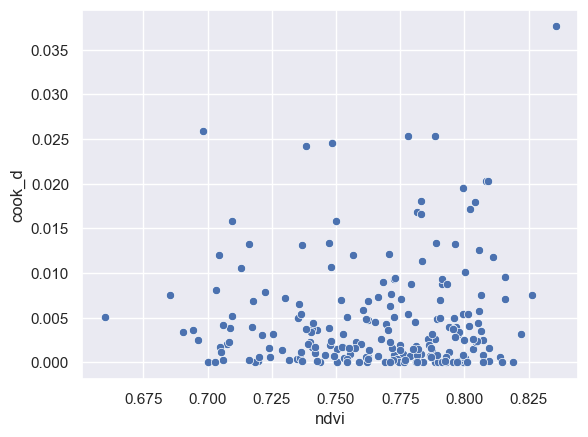

In [8]:
sns.scatterplot(data=df_cooks, x= 'ndvi', y = 'cook_d')

In [9]:
# Do the same Cooks D for Nitrogen
y = df_nutes_R2['N']
x = df_nutes_R2['ndvi']
reg = sm.OLS(y, x).fit()
influence = reg.get_influence()
cooks = influence.cooks_distance
df_cooks = pd.DataFrame({'ndvi': df_nutes_R2['ndvi'], 'cook_d': cooks[0]})

<Axes: xlabel='ndvi', ylabel='cook_d'>

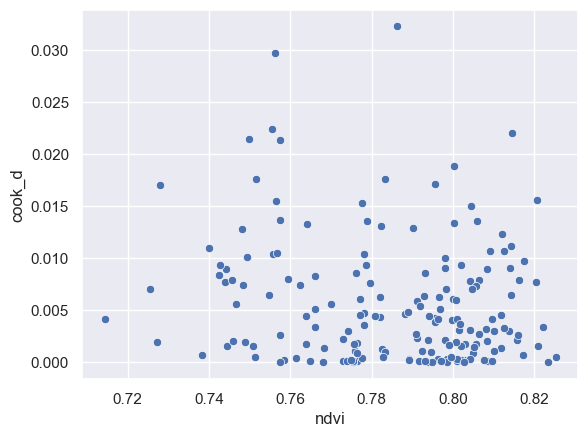

In [10]:
sns.scatterplot(data=df_cooks, x= 'ndvi', y = 'cook_d')

In [11]:
gkf = GroupKFold(n_splits=5)

In [12]:
# Loop through variables and predict based on ndvi
# Append r2 score from external validation into a dictionary to be exported to csv later
scores = {}
# Loop through GasEx targets first
for target in targets:
    y = np.array(df_gasex[target]).reshape(-1,1)
    x = np.array(df_gasex[['ndvi', 'PC1']]).reshape(-1, 2)
    groups = np.array(df_gasex['Name'])
    scores[target] = []
    i = 0

    for train_ind, test_ind in gkf.split(X = x, y = y, groups = groups):
        #print(df_gasex.loc[test_ind, 'Name'])
        print(y[test_ind].shape)
        #sns.histplot(x = y[test_ind].flatten(), hue = df_gasex.loc[test_ind, 'Ntreatment'])
        #plt.title(target + '-CV{}'.format(i))
        #plt.show()
        i += 1
        reg = LinearRegression().fit(x[train_ind], y[train_ind])
        predictions = reg.predict(x[test_ind])
        r2= r2_score(y[test_ind], predictions)
        print(r2)
    
        scores[target].append(r2)
        
    


(43, 1)
0.09218604985117418
(43, 1)
0.035647120125150256
(43, 1)
-0.038768697467639335
(42, 1)
0.072094581185008
(42, 1)
-0.08123056495945846
(43, 1)
0.052624342296748505
(43, 1)
0.24483559562305957
(43, 1)
-0.13303192637355865
(42, 1)
0.23702253790593708
(42, 1)
0.20200753104784075
(43, 1)
-0.0974083341028722
(43, 1)
-0.07289667829458302
(43, 1)
0.11103623944792185
(42, 1)
0.20850557779765178
(42, 1)
0.019093535581570453
(43, 1)
0.11580246746624434
(43, 1)
-0.20444106816660068
(43, 1)
-0.06949281312150224
(42, 1)
0.0010011424490597998
(42, 1)
-0.305958168715847
(43, 1)
-0.058411943804451916
(43, 1)
-0.13859977394097855
(43, 1)
0.0955338983425843
(42, 1)
0.16879402738830596
(42, 1)
-0.048774358393949724


In [8]:
df_scores = pd.DataFrame(scores)
df_scores.to_clipboard()

In [13]:
gkf = GroupKFold(n_splits=5)
print(df_nutes.columns[18:30])
targets = list(df_nutes.columns[18:30])

Index(['N', 'P', 'K', 'Ca', 'Mg', 'Na', 'S', 'Zn', 'Mn', 'Fe', 'Cu', 'B'], dtype='object')


16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


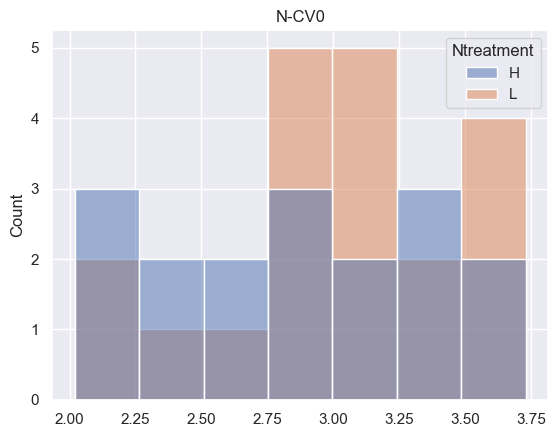

0.6210817180512909
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


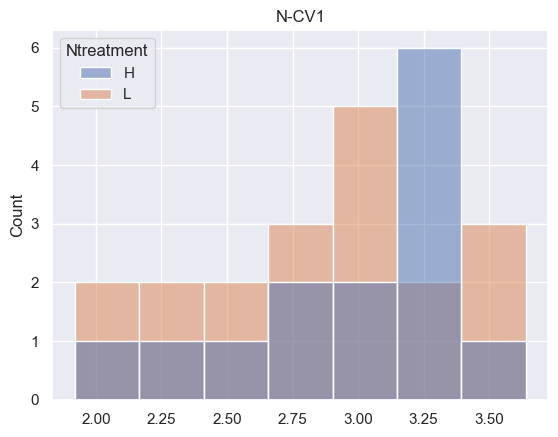

0.44091928919683543
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


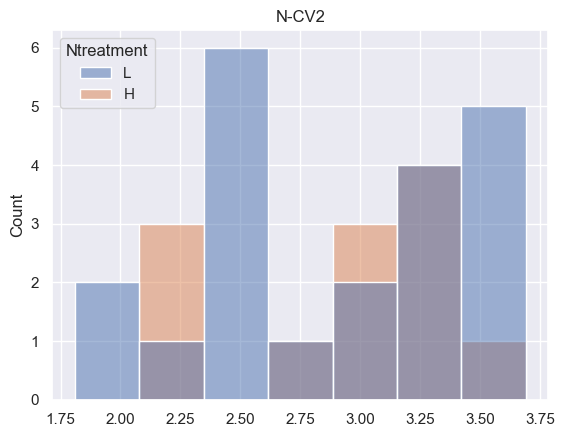

0.44346688107751964
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


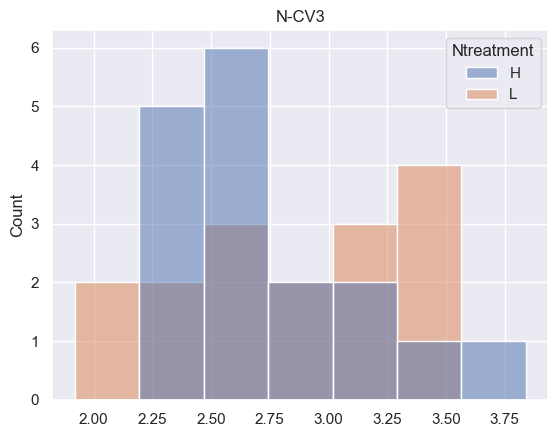

0.19995000801543794
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


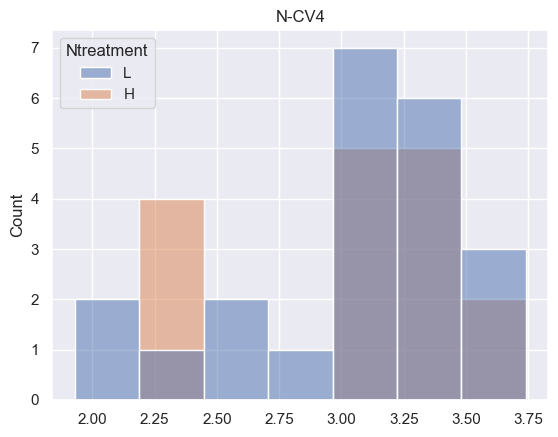

0.48339027532676426
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


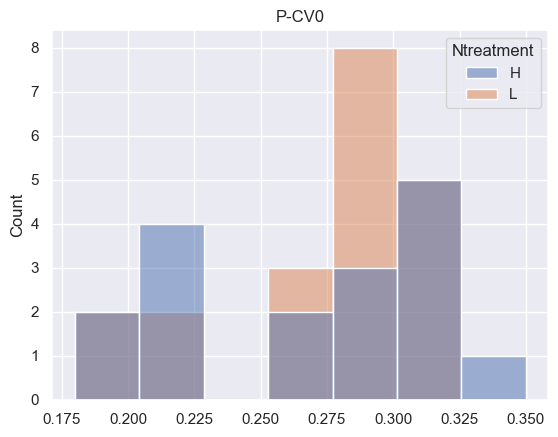

0.5595004706712144
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


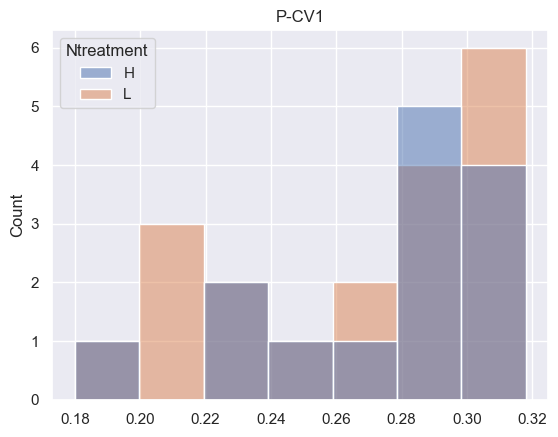

0.3755034665140651
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


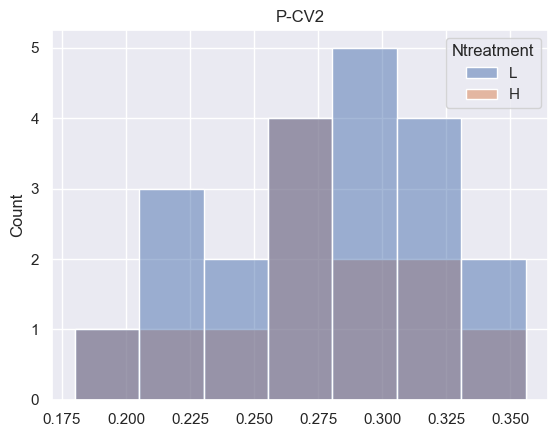

0.2729964544075495
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


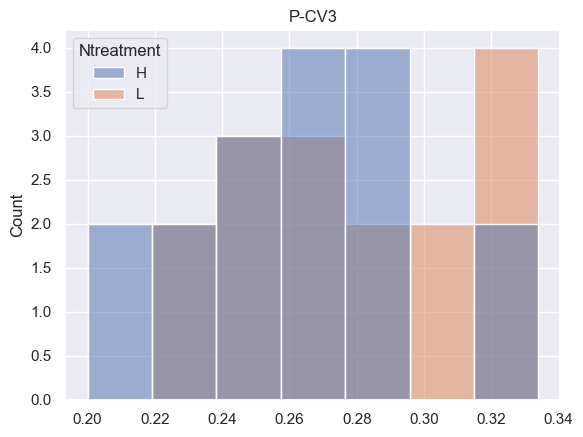

0.136638979453246
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


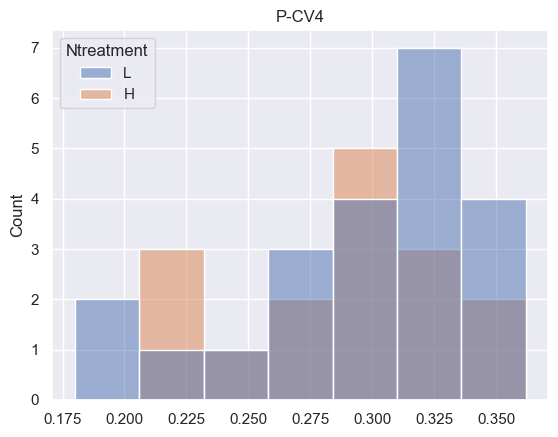

0.29342824826234104
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


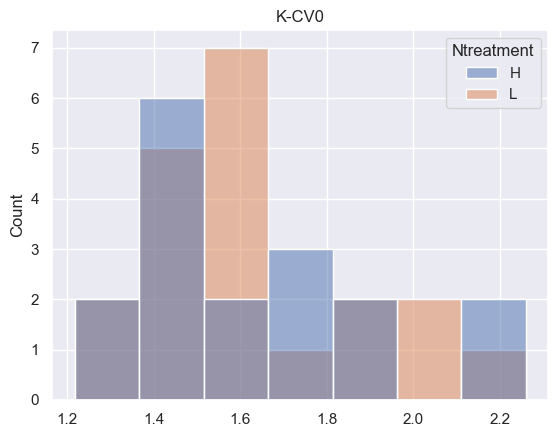

0.10524597158869187
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


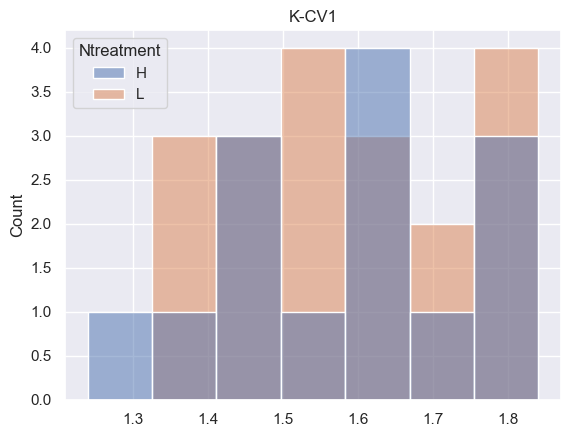

-0.21053939794363496
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


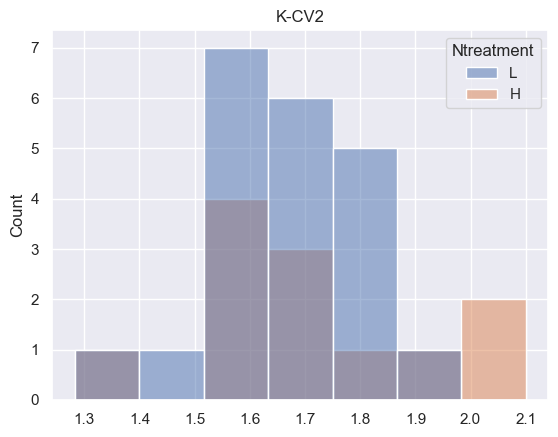

-0.18549709682965765
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


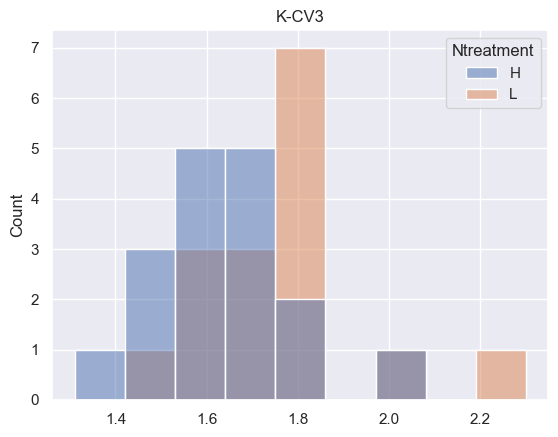

-0.21337882463371605
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


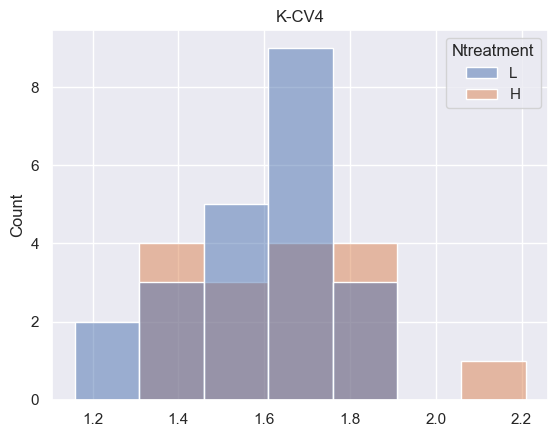

0.08754204261941001
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


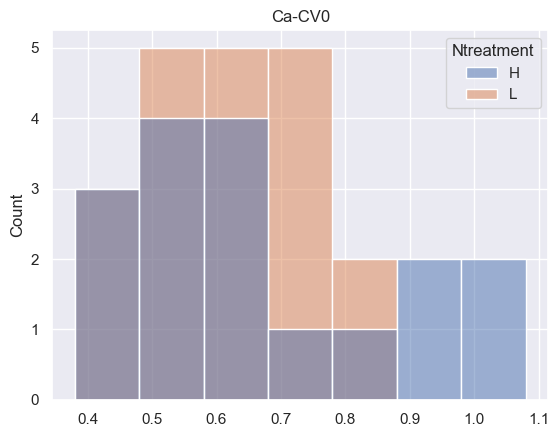

-0.21849869183481796
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


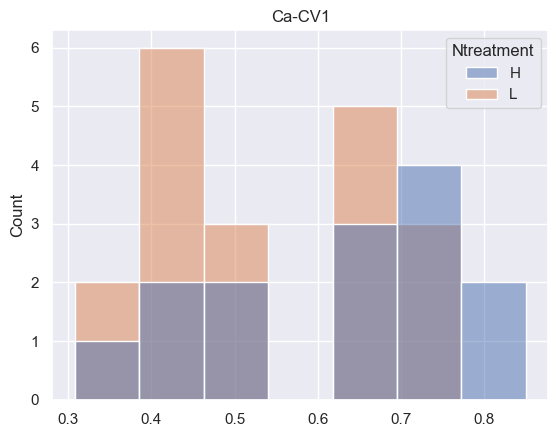

-0.015492658171975204
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


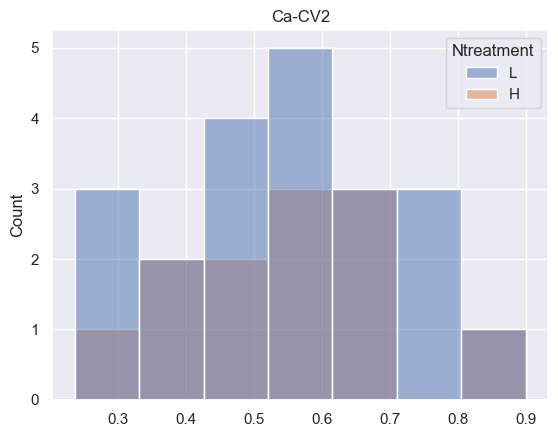

-0.032753750223726064
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


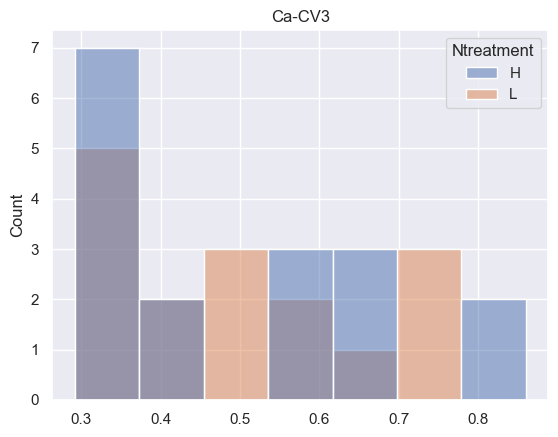

-0.40196725162016156
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


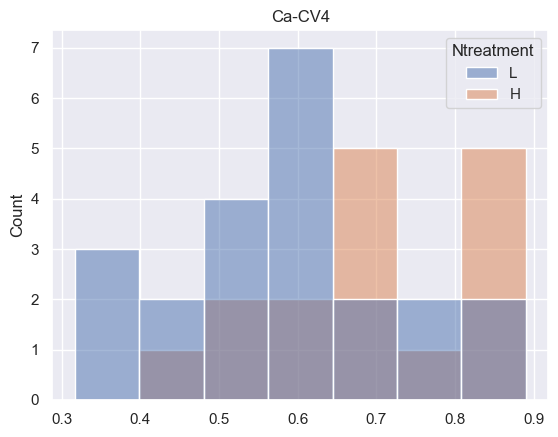

-0.12600591256054416
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


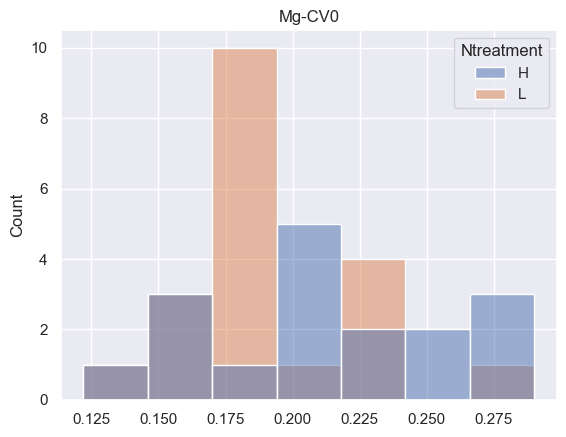

-0.19530822786993318
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


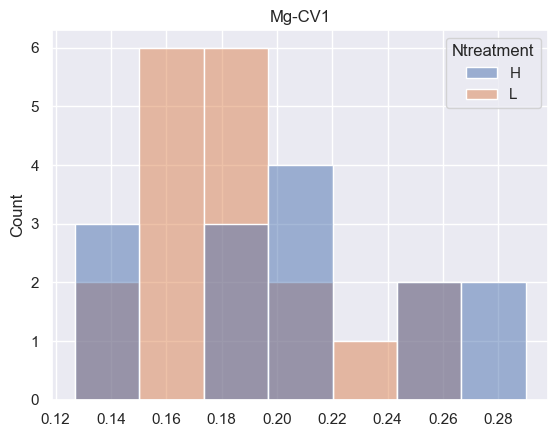

-0.1326489620900586
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


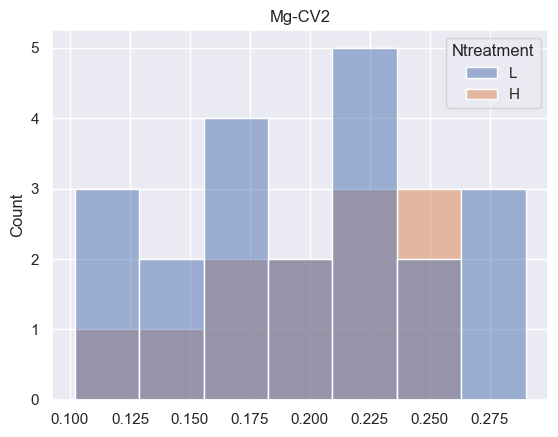

-0.10814999081541332
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


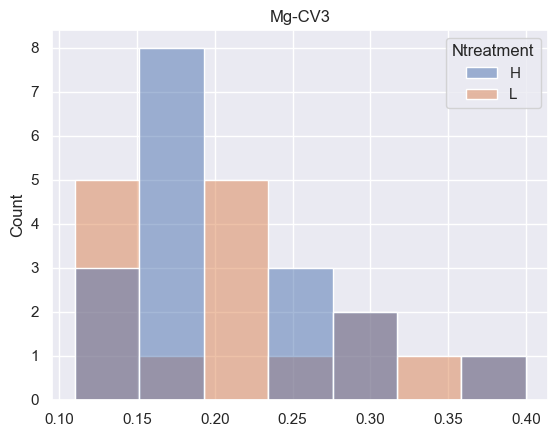

0.07936004993689327
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


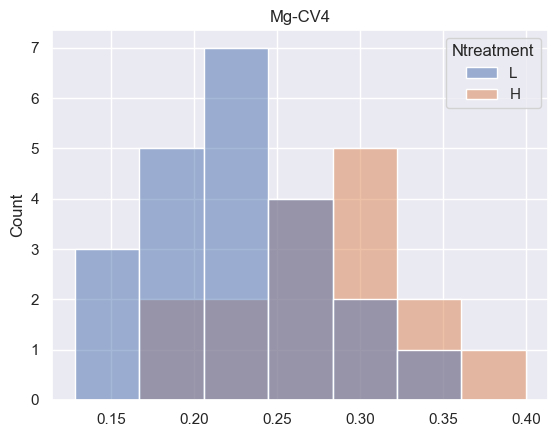

-0.2931287317156499
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


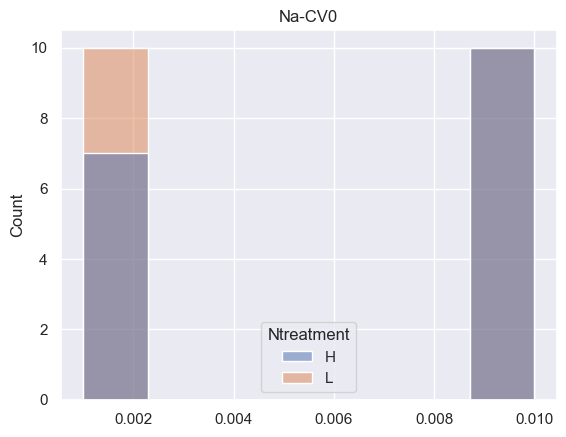

-0.05416083588728027
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


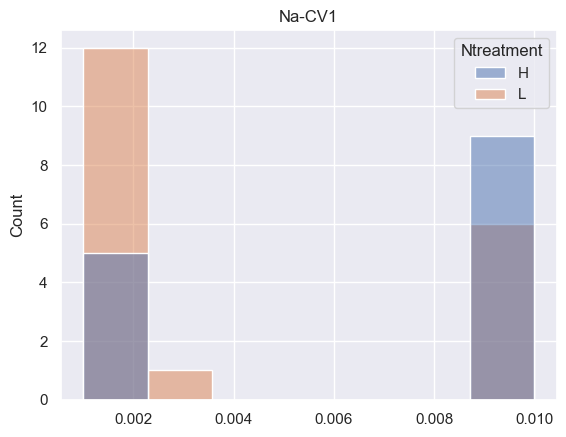

0.040541816355117555
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


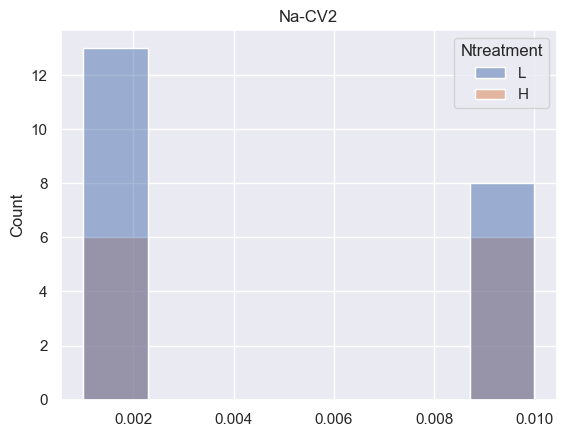

0.02879862859059379
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


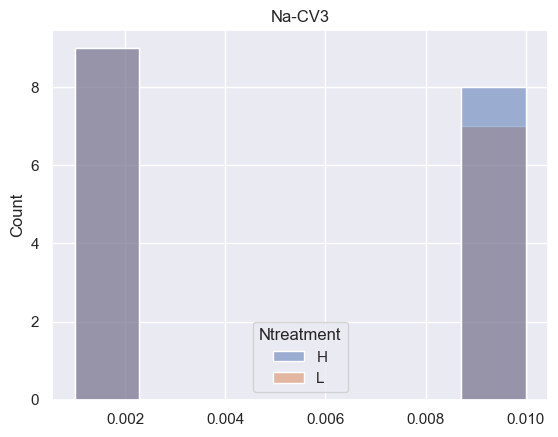

0.03679738319254122
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


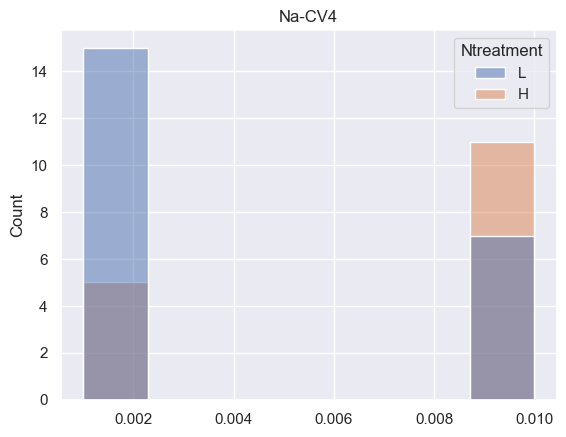

0.011873906660229916
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


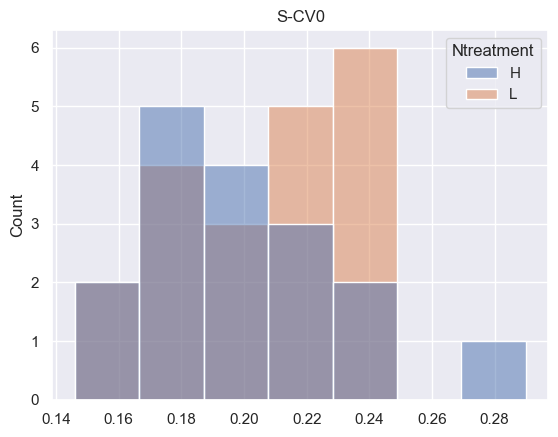

0.4935656219843041
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


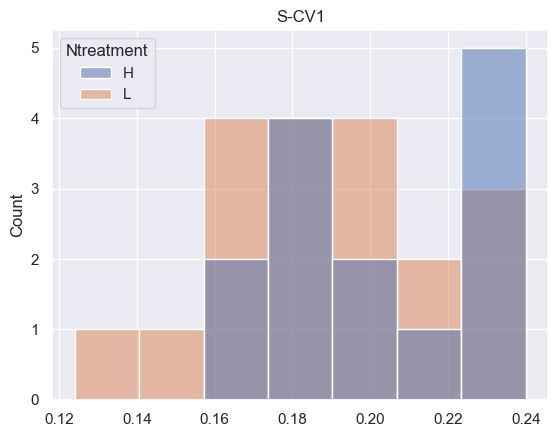

0.348173667186792
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


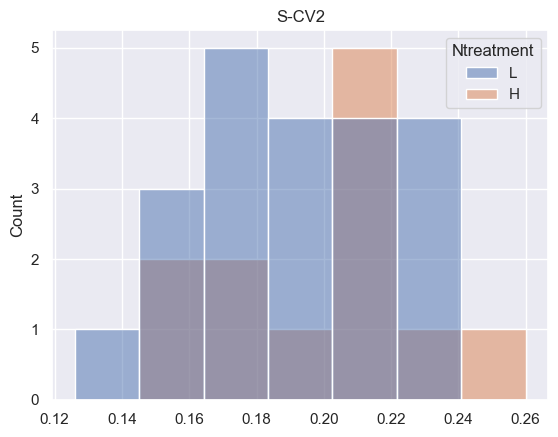

0.20816731704058666
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


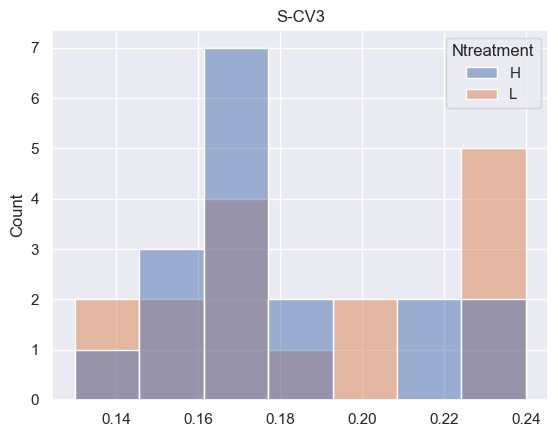

-0.19281647747573105
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


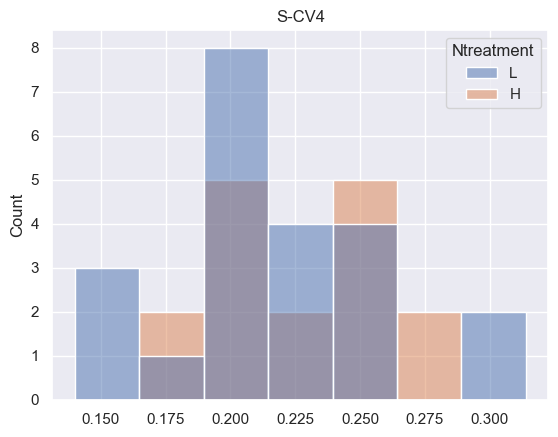

0.18043168084480254
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


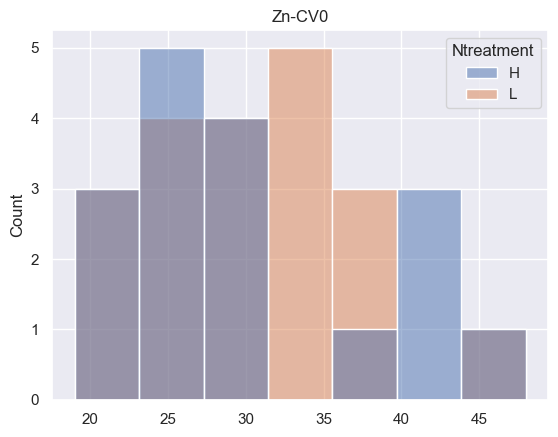

0.10889330652498874
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


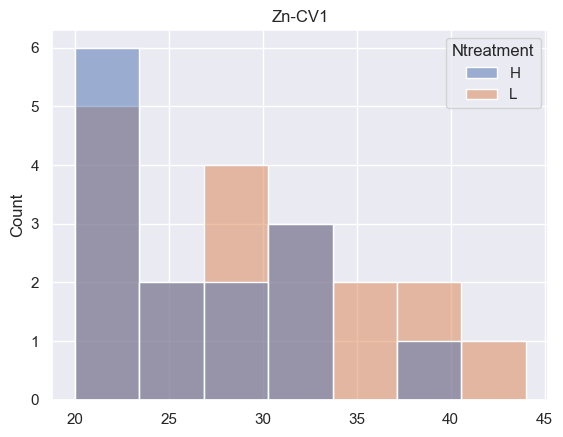

0.06591643870498076
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


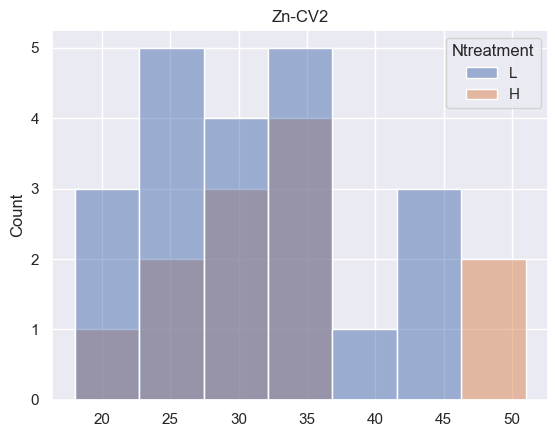

-0.06106779867842049
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


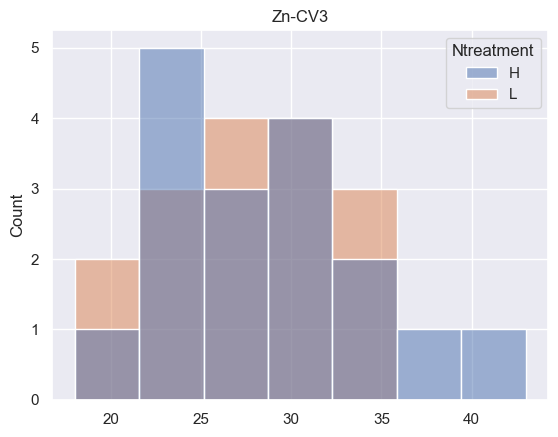

-0.12012819618385762
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


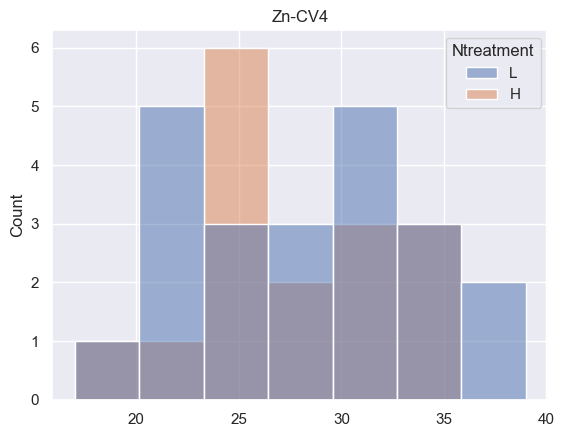

-0.25913447690845315
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


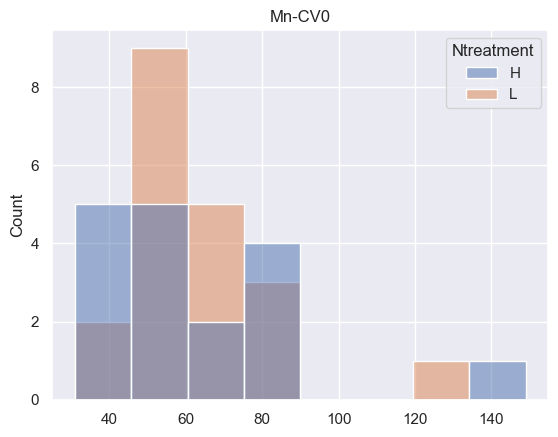

0.08844761840878645
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


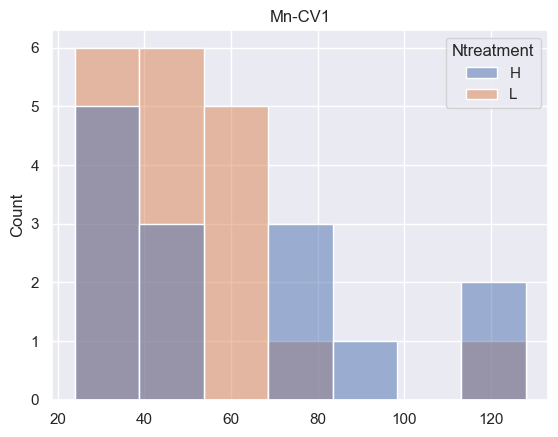

0.05589060100718557
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


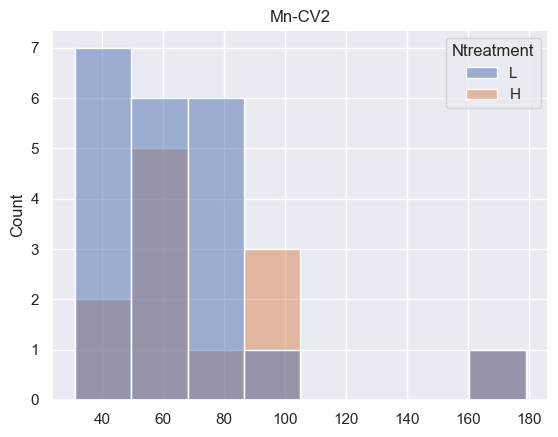

0.10231238620039584
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


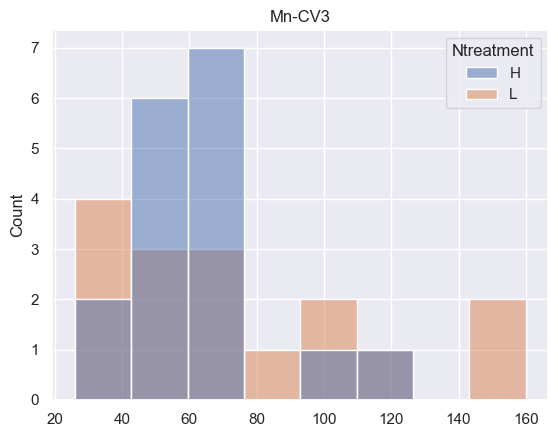

0.16186956803805408
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


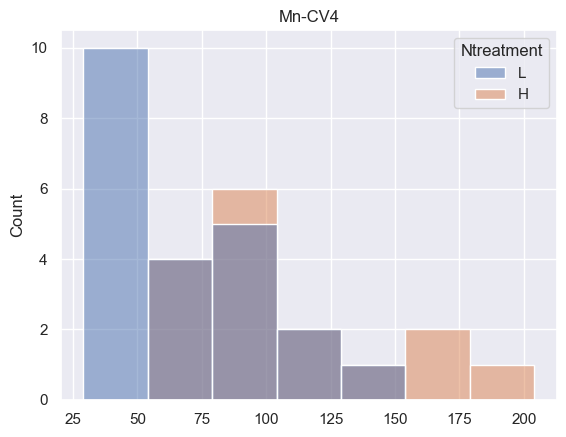

-0.06412238243753388
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


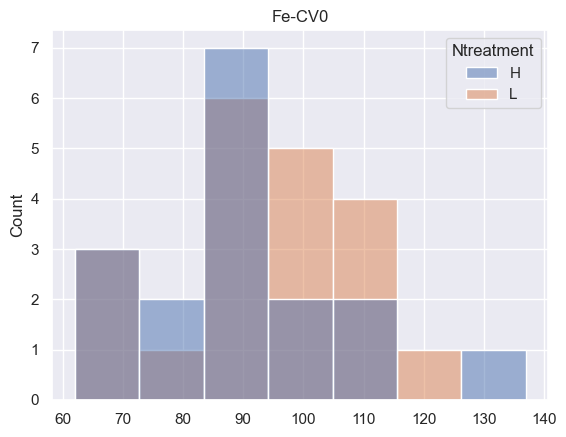

0.48556169148060024
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


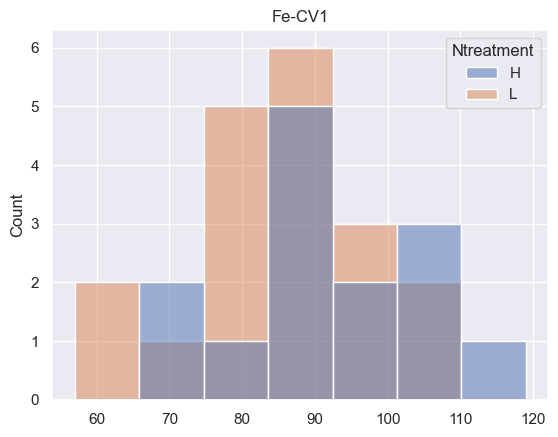

0.13265023113848473
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


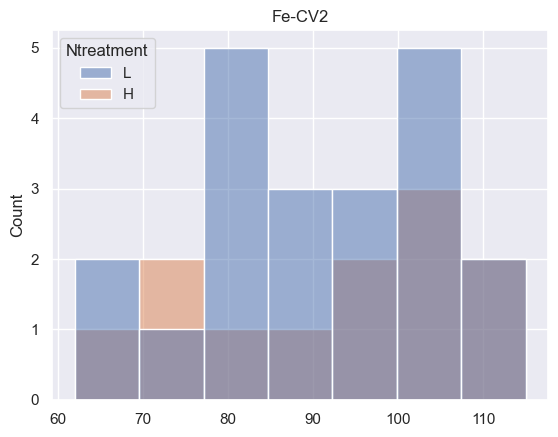

0.26301208220176686
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


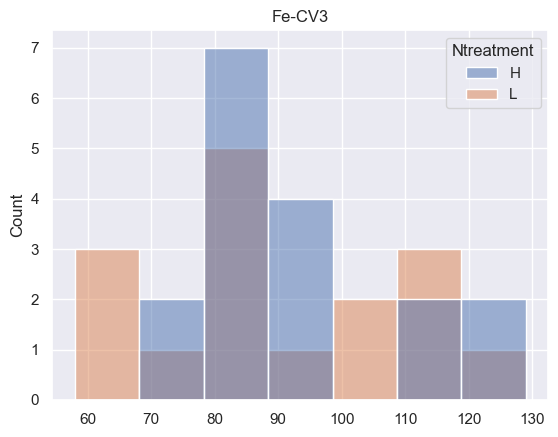

-0.019534008611465925
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


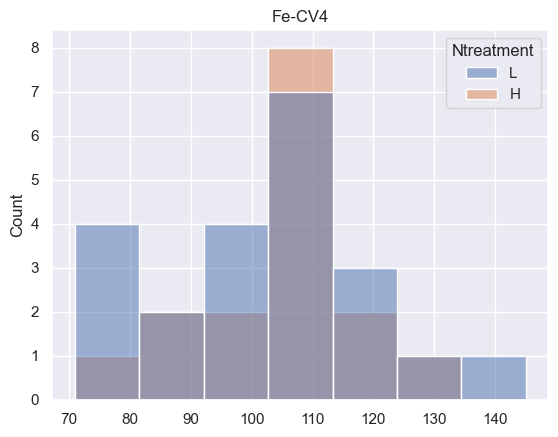

-0.13923672300028533
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


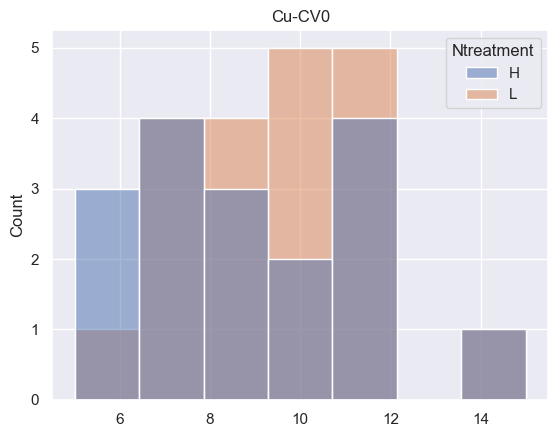

0.45918751119873247
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


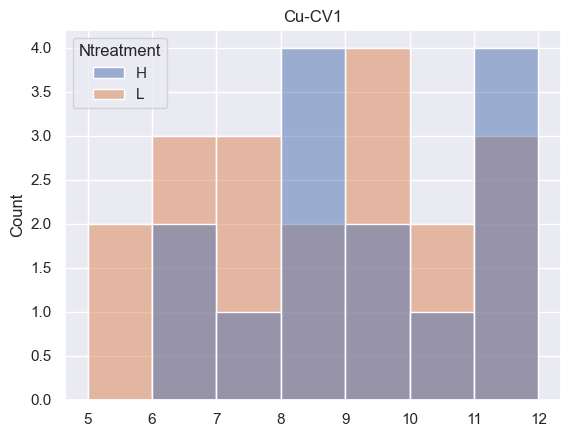

0.3235577193747151
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


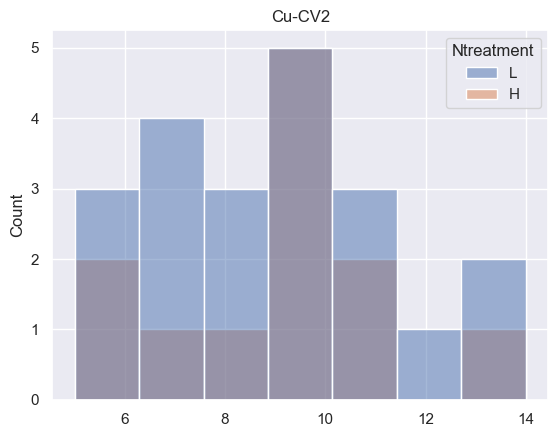

0.2581280772238994
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


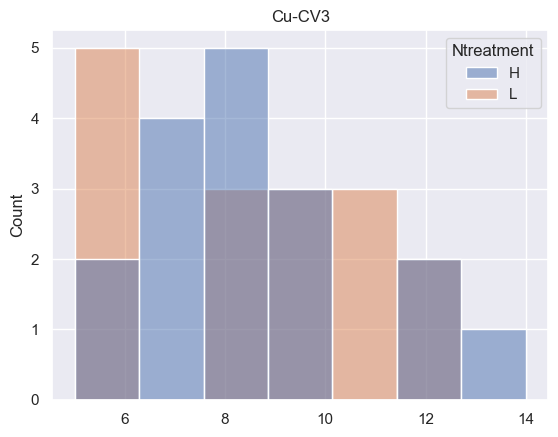

0.15495384968397097
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


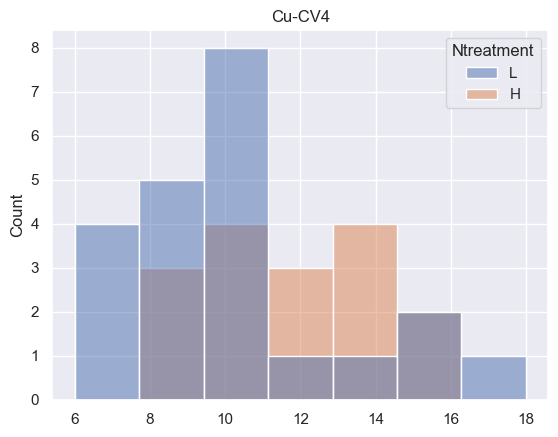

-0.13712819566205736
16       B73XPHK76
17     PHB47XPHK76
18     LH244XPHK76
20     LH244XPHN82
23       B73XPHK76
26     LH244XPHK76
33     LH244XPHN82
43     LH244XPHN82
46     PHB47XPHK76
50       B73XPHK76
64     PHB47XPHK76
65     LH244XPHN82
70       B73XPHK76
72     PHB47XPHK76
74     LH244XPHN82
80     LH244XPHK76
88     LH244XPHN82
93     TX714XPHZ51
102    PHB47XPHK76
110      B73XPHK76
111    LH244XPHK76
113    LH244XPHN82
115    LH244XPHK76
120    LH244XPHN82
125      B73XPHK76
126    TX714XPHZ51
128    PHB47XPHK76
137    LH244XPHN82
144    TX714XPHZ51
151    PHB47XPHK76
152    LH244XPHK76
154      B73XPHK76
161    PHB47XPHK76
164    LH244XPHN82
169    LH244XPHK76
170      B73XPHK76
173    TX714XPHZ51
Name: Hybrid, dtype: object
(37, 1)


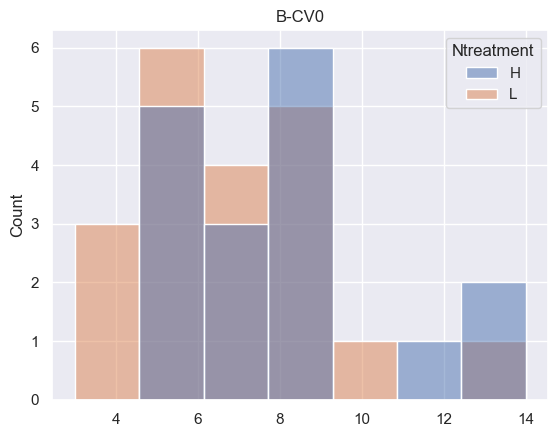

-0.016434259004209473
4       LH244XMO17
10     LH195XPHK76
15     LH244XPHZ51
19     PHB47XPHZ51
21     LH195XPHK76
30      LH244XMO17
35     LH244XPHZ51
40     PHB47XPHZ51
49     LH195XPHK76
52     LH195XPHK76
54     LH244XPHZ51
56     PHB47XPHZ51
60      LH244XMO17
75     PHB47XPHZ51
77      LH244XMO17
81     LH244XPHZ51
86     LH195XPHK76
89     LH195XPHK76
95     PHB47XPHZ51
100    LH244XPHZ51
105     LH244XMO17
107    LH195XPHK76
116     LH244XMO17
123    PHB47XPHZ51
129    LH195XPHK76
132    LH244XPHZ51
140    LH195XPHK76
148     LH244XMO17
150    LH244XPHZ51
153    PHB47XPHZ51
157    PHB47XPHZ51
163    LH195XPHK76
172     LH244XMO17
Name: Hybrid, dtype: object
(33, 1)


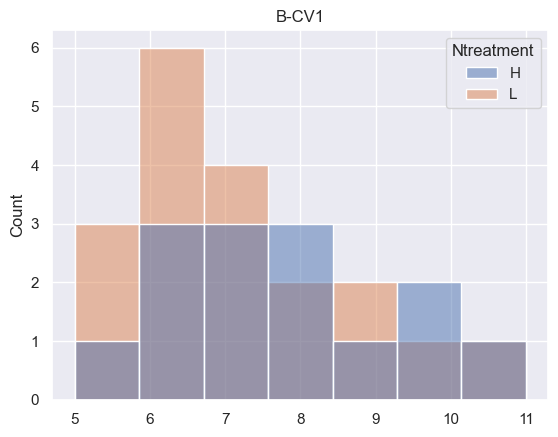

-0.0011330895343455438
2      LH195XPHZ51
6       PHB47XMO17
9         B73XMO17
11       B73XPHN82
22     LH195XPHZ51
27        B73XMO17
28       B73XPHN82
39      PHB47XMO17
42       B73XPHN82
44        B73XMO17
57      PHB47XMO17
58     LH195XPHZ51
61       B73XPHN82
66     LH195XPHZ51
67        B73XMO17
83       B73XPHN82
85      PHB47XMO17
87        B73XMO17
91       B73XPHN82
98        B73XMO17
103    LH195XPHZ51
104     PHB47XMO17
108      B73XPHN82
117     PHB47XMO17
131    LH195XPHZ51
133       B73XMO17
134      B73XPHN82
142     PHB47XMO17
143       B73XMO17
145    LH195XPHZ51
149      B73XPHN82
162    LH195XPHZ51
168       B73XMO17
Name: Hybrid, dtype: object
(33, 1)


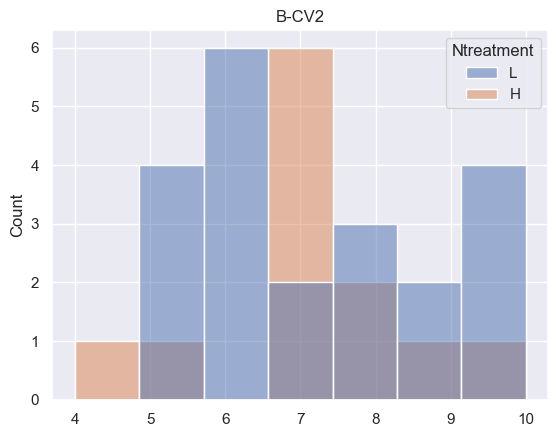

-0.03215101310858581
1      LH195XPHN82
12      LH145XLH82
13     PHG29XPHG47
14      LH195XMO17
24      LH145XLH82
32      LH195XMO17
34     PHG29XPHG47
38     LH195XPHN82
45      LH145XLH82
51      LH195XMO17
53      LH145XLH82
59     LH195XPHN82
62     PHG29XPHG47
68      LH145XLH82
71     PHG29XPHG47
79      LH195XMO17
84     LH195XPHN82
90      LH195XMO17
92      LH195XMO17
94      LH145XLH82
96     PHG29XPHG47
97     LH195XPHN82
118     LH145XLH82
121     LH195XMO17
124    LH195XPHN82
127    PHG29XPHG47
136    LH195XPHN82
138     LH145XLH82
141     LH195XMO17
147    PHG29XPHG47
158     LH195XMO17
160    LH195XPHN82
171     LH145XLH82
Name: Hybrid, dtype: object
(33, 1)


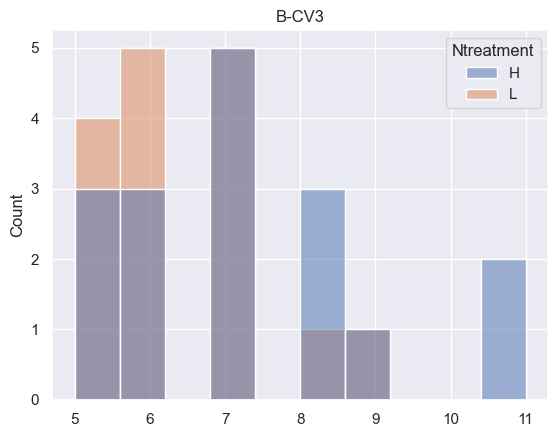

-0.28280413920613223
0      PHJ40XPHAJ0
3        B73XPHZ51
5      PHJ89XPH207
7      PHRE1XPHTD5
8      PHB47XPHN82
25     PHRE1XPHTD5
29     PHJ89XPH207
31       B73XPHZ51
36     PHJ40XPHAJ0
37     PHB47XPHN82
41     PHJ89XPH207
47       B73XPHZ51
48     PHJ40XPHAJ0
55     PHJ89XPH207
63     PHB47XPHN82
69     PHJ40XPHAJ0
73     PHRE1XPHTD5
76     PHB47XPHN82
78     PHJ89XPH207
82       B73XPHZ51
99     PHJ40XPHAJ0
101    PHJ89XPH207
106      B73XPHZ51
109    PHB47XPHN82
112    PHRE1XPHTD5
114      B73XPHZ51
119    PHJ40XPHAJ0
122    PHB47XPHN82
130    PHJ89XPH207
135    PHRE1XPHTD5
139    PHJ89XPH207
146    PHRE1XPHTD5
155    PHB47XPHN82
156    PHJ40XPHAJ0
159      B73XPHZ51
165    PHJ40XPHAJ0
166    PHJ89XPH207
167    PHB47XPHN82
Name: Hybrid, dtype: object
(38, 1)


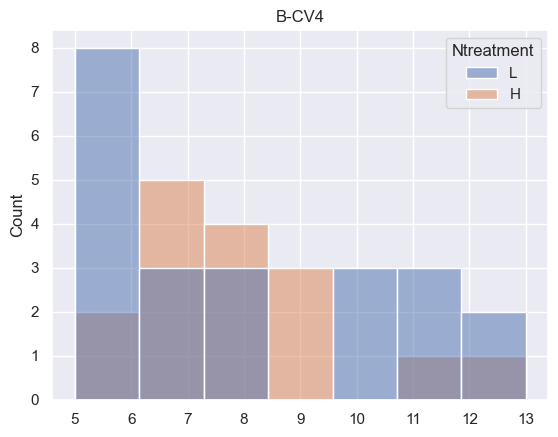

-0.22702356232040244


In [14]:
# Loop through variables and predict nutes based on ndvi
scores = {}
for target in targets:
    y = np.array(df_nutes_R2[target]).reshape(-1,1)
    x = np.array(df_nutes_R2[['ndvi', 'PC1']]).reshape(-1,2)
    groups = np.array(df_nutes_R2['Hybrid'])
    scores[target] = []
    i = 0

    for train_ind, test_ind in gkf.split(X = x, y = y, groups = groups):
        print(df_nutes_R2.loc[test_ind, 'Hybrid'])
        print(y[test_ind].shape)
        sns.histplot(x = y[test_ind].flatten(), hue = df_gasex.loc[test_ind, 'Ntreatment'])
        plt.title(target + '-CV{}'.format(i))
        plt.show()
        i += 1
        reg = LinearRegression().fit(x[train_ind], y[train_ind])
        predictions = reg.predict(x[test_ind])
        r2= r2_score(y[test_ind], predictions)
        print(r2)
        scores[target].append(r2)
        
# graphed histogram between folds just to see what they look like

In [11]:
df_scores = pd.DataFrame(scores)
df_scores.to_clipboard(index = False)

<Axes: xlabel='Na', ylabel='Count'>

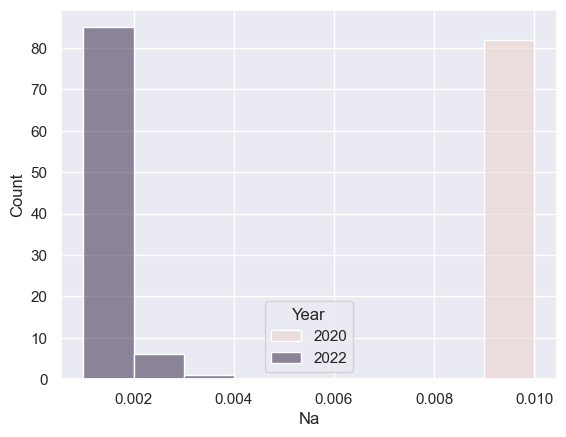

In [16]:
sns.histplot(data = df_nutes_R2, x = 'Na', hue = 'Year')